# Demonstration of correct rows in left-join crossmatch

Last time, the expected pixel output was correct, but the `.compute()` producing the rows wasn't.  Today it is!

In [1]:
import lsdb

In [2]:
catalog_root = "https://data.lsdb.io/hats"
# catalog_root = "/astro/store/shire/dtj1s/"

Use a larger segment for the left catalog.  This one will have 3 partitions.

In [3]:
gaia3_sm = lsdb.open_catalog(
    f"{catalog_root}/gaia_dr3",
    columns=["source_id", "ra", "dec", "parallax", "phot_g_n_obs", "phot_g_mean_mag"],
    search_filter=lsdb.ConeSearch(280, 0, radius_arcsec=2900)
)                                                                                                                 
gaia3_sm

,source_id,ra,dec,parallax,phot_g_n_obs,phot_g_mean_mag
npartitions=3,,,,,,
"Order: 5, Pixel: 7567",int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int16[pyarrow],float[pyarrow]
"Order: 4, Pixel: 1897",...,...,...,...,...,...
"Order: 4, Pixel: 1900",...,...,...,...,...,...


The right catalog will only have 1 partition.

In [4]:
ztf22_sm = lsdb.open_catalog(
    f"{catalog_root}/ztf_dr22",
    columns=["objectid", "objra", "objdec", "nepochs", "hmjd", "mag", "magerr"],
    search_filter=lsdb.ConeSearch(280, 0, radius_arcsec=36)
)
ztf22_sm = ztf22_sm.nest_lists(
    list_columns=["hmjd", "mag", "magerr"],
    name="lc")
ztf22_sm

,objectid,objra,objdec,nepochs,lc
npartitions=1,,,,,
"Order: 6, Pixel: 30357",int64[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],"nested<hmjd: [double], mag: [float], magerr: [..."


How do each of these catalogs cover their part of the sky?

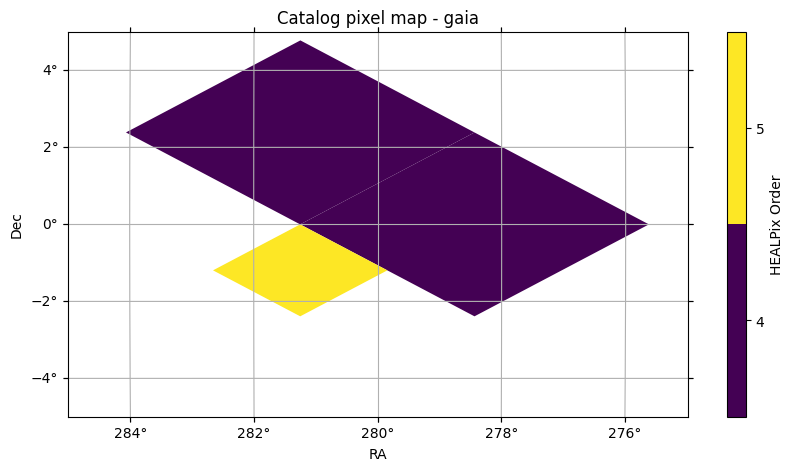

In [5]:
import astropy.units as u
from astropy.coordinates import SkyCoord

fov = (10 * u.deg, 10 * u.deg)
center = SkyCoord(280 * u.deg, 0 * u.deg)
fig, ax = gaia3_sm.plot_pixels(projection="AIT", fov=fov, center=center)

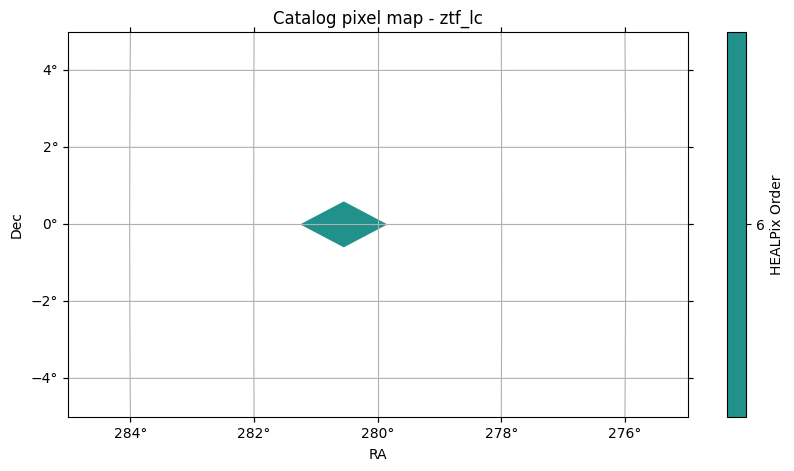

In [6]:
fig, ax = ztf22_sm.plot_pixels(projection="AIT", fov=fov, center=center)

And the points:

/Users/derekjones/code/lsdb/src/lsdb/catalog/catalog.py:299: FutureWarning: The default suffix behavior will change from applying suffixes to all columns to only applying suffixes to overlapping columns in a future release.To maintain the current behavior, explicitly set `suffix_method='all_columns'`. To change to the new behavior, set `suffix_method='overlapping_columns'`.
  warnings.warn(


1


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel map - gaia_x_ztf_lc'}>)

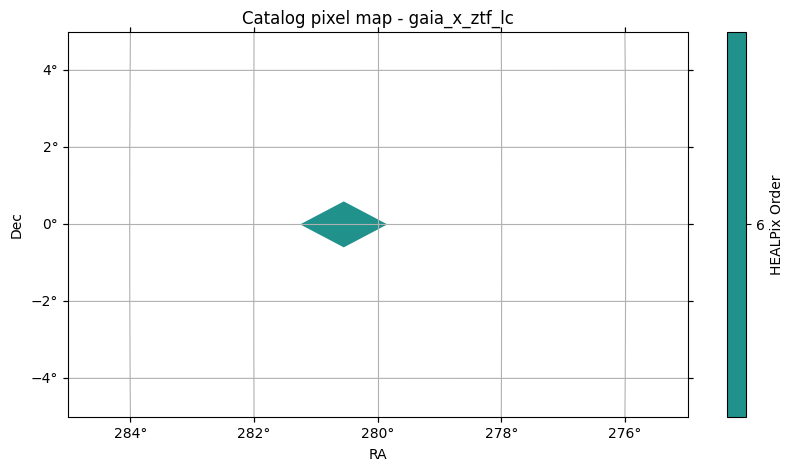

In [7]:
inner = gaia3_sm.crossmatch(ztf22_sm)
print(inner.npartitions)
inner.plot_pixels(projection="AIT", fov=fov, center=center)

6


/Users/derekjones/code/lsdb/src/lsdb/catalog/catalog.py:299: FutureWarning: The default suffix behavior will change from applying suffixes to all columns to only applying suffixes to overlapping columns in a future release.To maintain the current behavior, explicitly set `suffix_method='all_columns'`. To change to the new behavior, set `suffix_method='overlapping_columns'`.
  warnings.warn(


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel map - gaia_x_ztf_lc'}>)

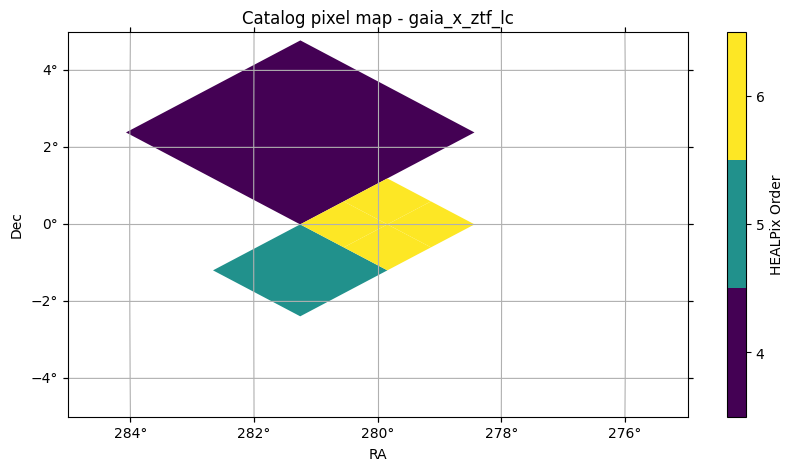

In [8]:
left = gaia3_sm.crossmatch(ztf22_sm, how='left')
print(left.npartitions)
left.plot_pixels(projection="AIT", fov=fov, center=center)

1


/Users/derekjones/code/lsdb/src/lsdb/catalog/catalog.py:299: FutureWarning: The default suffix behavior will change from applying suffixes to all columns to only applying suffixes to overlapping columns in a future release.To maintain the current behavior, explicitly set `suffix_method='all_columns'`. To change to the new behavior, set `suffix_method='overlapping_columns'`.
  warnings.warn(


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel map - ztf_lc_x_gaia'}>)

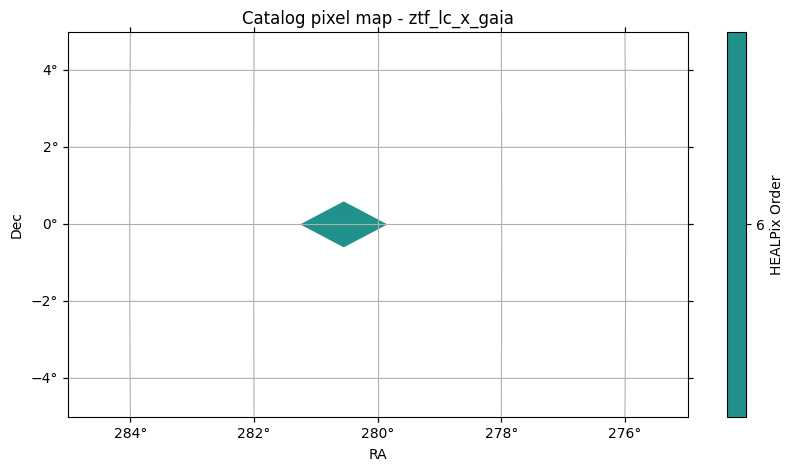

In [9]:
other_left = ztf22_sm.crossmatch(gaia3_sm, how='left')
print(other_left.npartitions)
other_left.plot_pixels(projection="AIT", fov=fov, center=center)

Try one where the Gaia catalog *is* filtered down to one partition, but a lower pixel dimension.

In [10]:
gaia3_tiny = lsdb.open_catalog(
    "https://data.lsdb.io/hats/gaia_dr3",
    columns=["source_id", "ra", "dec", "parallax", "phot_g_n_obs", "phot_g_mean_mag"],
    search_filter=lsdb.ConeSearch(280, 0, radius_arcsec=1800)
)                                                                                                                 
gaia3_tiny

,source_id,ra,dec,parallax,phot_g_n_obs,phot_g_mean_mag
npartitions=1,,,,,,
"Order: 4, Pixel: 1897",int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int16[pyarrow],float[pyarrow]


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel map - gaia'}>)

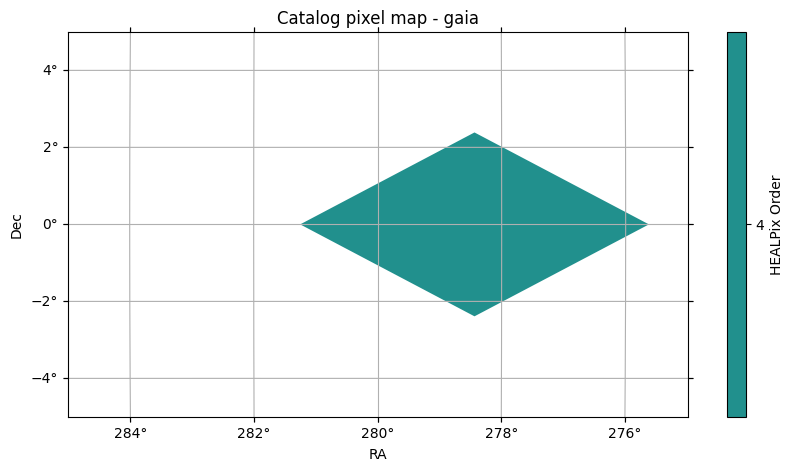

In [11]:
gaia3_tiny.plot_pixels(projection="AIT", fov=fov, center=center)

4


/Users/derekjones/code/lsdb/src/lsdb/catalog/catalog.py:299: FutureWarning: The default suffix behavior will change from applying suffixes to all columns to only applying suffixes to overlapping columns in a future release.To maintain the current behavior, explicitly set `suffix_method='all_columns'`. To change to the new behavior, set `suffix_method='overlapping_columns'`.
  warnings.warn(


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel map - gaia_x_ztf_lc'}>)

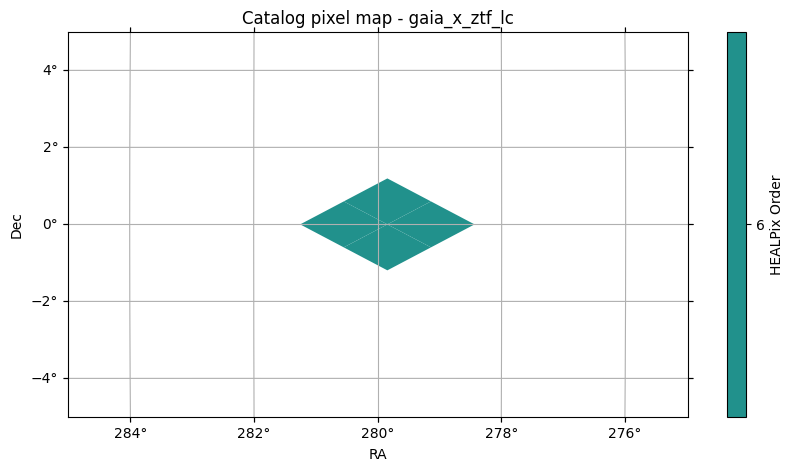

In [12]:
left_tiny = gaia3_tiny.crossmatch(ztf22_sm, how='left')
print(left_tiny.npartitions)
left_tiny.plot_pixels(projection="AIT", fov=fov, center=center)

In [13]:
left_tiny.compute()

Crossmatching how=left pixels L4_1897 R6_30358
Crossmatching how=left pixels L4_1897 R6_30359
Crossmatching how=left pixels L4_1897 R6_30356
Crossmatching how=left pixels L4_1897 R6_30357


source_id_gaia     ra_gaia  dec_gaia  parallax_gaia  \
_healpix_29                                                                     
2136143817373750705  4272287600946980224  280.051008 -0.495641           <NA>   
2136143825196316284  4272287635296222336  280.069283 -0.493469       0.189955   
...                                  ...         ...       ...            ...   
2136351677441167870  4272703353773162240  279.963576  0.495886           <NA>   
2136351678151337181  4272703353773164160   279.96655  0.497963       -1.08241   

                     phot_g_n_obs_gaia  phot_g_mean_mag_gaia  objectid_ztf_lc  \
_healpix_29                                                                     
2136143817373750705                 59             20.791357             <NA>   
2136143825196316284                181             19.802414             <NA>   
...                                ...                   ...              ...   
2136351677441167870                 66             20.864191             <NA>   
2136351678151337181                167             20.567566             <NA>   

                     objra_ztf_lc  objdec_ztf_lc  nepochs_ztf_lc lc_ztf_lc  \
_healpix_29                                                                  
2136143817373750705          <NA>           <NA>            <NA>      None   
2136143825196316284          <NA>           <NA>            <NA>      None   
...                           ...            ...             ...       ...   
2136351677441167870          <NA>           <NA>            <NA>      None   
2136351678151337181          <NA>           <NA>            <NA>      None   

                     _dist_arcsec  
_healpix_29                        
2136143817373750705          <NA>  
2136143825196316284          <NA>  
...                           ...  
2136351677441167870          <NA>  
2136351678151337181          <NA>  

[57261 rows x 12 columns]